### Principal Component Analysis

&nbsp;

Principal Component Analysis is undoubtedly the most abused algorithm in this repository, lol! Since iris is my default dataset, PCA is literally used in every python notebook for visualization except the text mining algorithms. It is one of my favorite algorithms for dimension reduction and data compression. Although I am not very inclined to use it for the purpose of matching or anomaly detection. What can be better? It is so intuitive that anyone with basic understanding of linear algebra can implement the algorithm in ten minutes! 

Basically, the algorithm intends to find some vectors $u$ to project the original data $x$ into lower dimension subspace. The objective of the projection $x^Tu$ is to retain as much variance as possible in the original dataset. In translation to math, we would love to maximize $||x^Tu||_2$ in geometry subject to $||u||_2 = 1$. We can solve the convex optimization by Lagrangian and it is easy to see that $u$ is merely a eigenvector of the covariance matrix of $x$. After selecting top $k$ eigenvectors, we would obtain the projection $x^Tu$ in a $k$ dimensional subspace rather than the original $n$ dimensional space.

Andrew Ng's material does not focus on singular value decomposition, more SVD content can be found in this tutorial on PCA by Google

https://arxiv.org/pdf/1404.1100.pdf

If that's not enough, feel free to read the whole textbook dedicated to PCA

http://cda.psych.uiuc.edu/statistical_learning_course/Jolliffe%20I.%20Principal%20Component%20Analysis%20(2ed.,%20Springer,%202002)(518s)_MVsa_.pdf



In [1]:
import sklearn.decomposition
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg

### Eigenvectors of Covariance Matrix

In [2]:
#compute eigenvector of covariance matrix
def self_pca_sigma(data,num_of_dims):

    #numbers of eigenvectors do not exceed the number of features
    assert num_of_dims<=data.shape[1],"the transformed dimension should be smaller than the original"

    #standardize the data by minus mean and divided by std
    #equivalent to z score in statistics
    #equivalent to scipy.stats.zscore or sklearn.preprocessing.scale
    z=np.divide(data-data.mean(axis=0),data.std(axis=0))

    #get covariance matrix
    #due to rounding errors
    #it doesnt equal to np.cov(z.T)
    sigma=z.T@z/z.shape[0]

    #get eigenvectors
    #please note eigenvectors are in the columns rather than rows
    eigvals,eigvecs=np.linalg.eig(sigma)
    
    return eigvecs

### Singular Value Decomposition

In [3]:
#compute singular values
def self_pca_svd(data,num_of_dims):

    #numbers of eigenvectors do not exceed the number of features
    assert num_of_dims<=data.shape[1],"the transformed dimension should be smaller than the original"

    #standardize the data by minus mean and divided by std
    #equivalent to z score in statistics
    #equivalent to scipy.stats.zscore or sklearn.preprocessing.scale
    z=np.divide(data-data.mean(axis=0),data.std(axis=0))

    #the computation of scipy.linalg.svd is supposed to be faster
    #scipy is a wrapper of LAPACK
    #it reduces z score matrix into bidiagonal form then runs svd
    #though np.linalg.eig is a wrapper of LAPACK as well
    #it computes eigenvector via divide and conquer algorithm
    U,D,Vt=scipy.linalg.svd(z)
    
    return U,D,Vt

In [4]:
#our fav iris data
iris=sklearn.datasets.load_iris()

#initialize
num_of_dims=2

#get z score to maintain consistency with self implementations
#although this is unnecessary for iris dataset
#as i have never done this in other notebooks
#because all features are in cm
#unit variance doesnt really hurt, does it
z=sklearn.preprocessing.StandardScaler().fit_transform(iris.data)

In [5]:
%timeit self_pca_sigma(iris.data,num_of_dims)

141 µs ± 1.92 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
#although svd is proclaimed to be faster
#it doesnt seem to be the case here
#maybe for a really large matrix
%timeit self_pca_svd(iris.data,num_of_dims)

314 µs ± 9.91 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
#self implementation
#technically, all features are in cm
#unit variance isnt needed
eigvecs_sigma=self_pca_sigma(iris.data,num_of_dims)

#select top k eigenvectors and transform
self_newdims_sigma=z@eigvecs_sigma[:,:num_of_dims]

In [8]:
#self implementation
U,D,Vt=self_pca_svd(iris.data,num_of_dims)

#select singular values
self_newdims_svd=z@Vt[:num_of_dims].T

In [9]:
#sklearn
clf=sklearn.decomposition.PCA(num_of_dims)

#transformation
skl_newdims=clf.fit_transform(z)

In [10]:
#as u can see, the second eigenvector has the opposite sign
#if u recalled what andrew ng said in the lectures
#the basis vector can rotate freely in its own subspace
#if u check out the code in sklearn
#one comment is "flip eigenvectors' sign to enforce deterministic output"
print(eigvecs_sigma.T[:num_of_dims])
print(Vt[:num_of_dims])
print(clf.components_)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


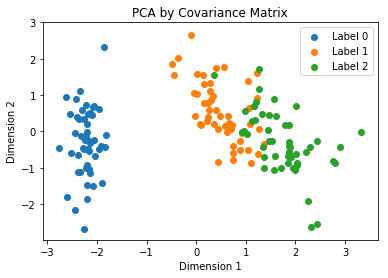

In [11]:
#given the opposite sign of the second eigenvector
#the viz looks like vertically flipped compared to sklearn
for i in np.unique(iris.target):
    plt.scatter(self_newdims_sigma[:,0][iris.target==i],
                self_newdims_sigma[:,1][iris.target==i],
                label=f'Label {int(i)}')
    
plt.title('PCA by Covariance Matrix')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc=0)
plt.show()

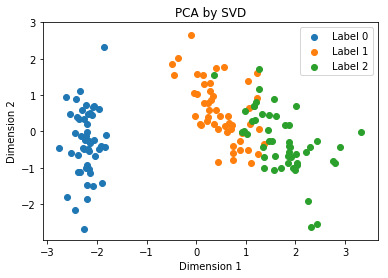

In [12]:
#given the opposite sign of the secondeigen vector
#the viz looks like vertically flipped compared to sklearn
for i in np.unique(iris.target):
    plt.scatter(self_newdims_svd[:,0][iris.target==i],
                self_newdims_svd[:,1][iris.target==i],
                label=f'Label {int(i)}')
    
plt.title('PCA by SVD')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc=0)
plt.show()

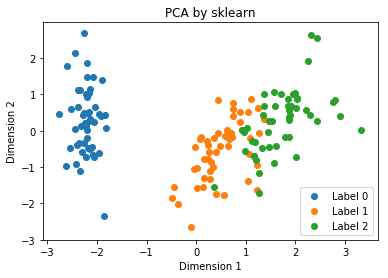

In [13]:
for i in np.unique(iris.target):
    plt.scatter(skl_newdims[:,0][iris.target==i],
                skl_newdims[:,1][iris.target==i],
                label=f'Label {int(i)}')
    
plt.title('PCA by sklearn')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc=0)
plt.show()

### Optimal Number of Components

&nbsp;

The optimal number of components is as facile as PCA itself. In our case, we already know the number because we merely want to make 2D visualization. For a more general case of dimension reduction, the optimal is determined by the explained variance (R squared). We set up a threshold (usually 95% in statistics) and find the minimum number of components to explain at least 95% of the variance.

You can find the error computation on page 9

https://courses.cs.washington.edu/courses/cse446/19au/10pca_annotated.pdf

In [14]:
#you can think of explained variance as r squared in regression
#the computation is essentially sum of squared regression
#equivalent to 1-sum of squared errors/sum of squared total
def explained_variance_general(data,newdims,eigvecs):

    miu=data.mean(axis=0)
    result=[]
    for i in range(newdims.shape[1]):
        
        #construct estimation by projection and components
        #since the components are orthogonal
        #the inverse of an orthogonal matrix is its transpose
        #the projection can be reverted by multiplying a transposed component
        #and add miu since it’s the standard preprocessing
        #if it makes you feel better
        #u can multiply the covariance matrix as well
        inversed=newdims[:,i].reshape(-1,1)@eigvecs[i].reshape(1,-1)+miu
        
        #sum of squared errors
        numerator=np.diag((inversed-data).T@(inversed-data)).sum()**0.5
        
        #sum of squared total
        denominator=np.diag((data-miu).T@(data-miu)).sum()**0.5
        
        #r squared
        result.append(1-(numerator/denominator)**2)
        
    return result

In [15]:
#svd is efficient but also convenient for explained variance computation
#explained standard deviation is merely on the diagonal of D 
#take the squared singular values and we obtain explained variance
def explained_variance_svd(data,D,num_of_dims):    
    return (D**2)[:num_of_dims]/(D**2).sum()

In [16]:
#explained variance of three methods are consistent
print(explained_variance_general(z,self_newdims_sigma,
                                 eigvecs_sigma.T[:num_of_dims]))

print(explained_variance_svd(z,D,num_of_dims))

print(clf.explained_variance_ratio_)

[0.7296244541329985, 0.22850761786701734]
[0.72962445 0.22850762]
[0.72962445 0.22850762]


In [17]:
#to demonstrate the concept of the optimal number
#we take svd as an example
#simply becuz its r squared computation is simple
rsquared=[]
threshold=0.95

#the number of components cannot exceed the number of features
for num_of_dims in range(1,iris.data.shape[1]+1):
    U,D,Vt=self_pca_svd(iris.data,num_of_dims)
    self_newdims_svd=z@Vt[:num_of_dims].T
    rsquared.append(sum(explained_variance_svd(z,D,num_of_dims)))

In [18]:
#find the optima
optima=[i for i in rsquared if i>threshold][0]
ind=rsquared.index(optima)+1

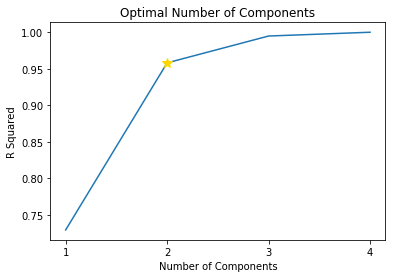

In [19]:
#viz
plt.plot(range(1,iris.data.shape[1]+1),rsquared)
plt.plot([ind],[optima],lw=0,marker='*',markersize=10,color='gold') 
plt.xticks(range(1,iris.data.shape[1]+1))
plt.title('Optimal Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('R Squared')
plt.show()